In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# # Walk through "data" folder, printing directories and files 
# # to use their names for file paths

# for root, dirs, files in os.walk("data"):
#     print("Current Directory:", root)
#     print()
#     print("Subdirectories:", dirs)
#     print()
#     print("Files:", files)

In [15]:
main_dir = 'data/processed'
file_name = 'customer_segmentation.csv'
file_path = os.path.join(main_dir, file_name)

In [16]:
df = pd.read_csv(file_path, index_col='Customer ID')

In [17]:
df.head()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,New_York_Young_Adults,New_York_Middle-aged_Adults,Los_Angeles_Young_Adults,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver
Customer ID,,,,,,,,,,,,,,,,,,,,,
101,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
102,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
103,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,0.333333,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
105,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,0.666667,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Remove columns that might not be useful for clustering (e.g., IDs)
# If "Customer ID" is the index, it's already excluded
X = df.values

In [22]:
# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows wi

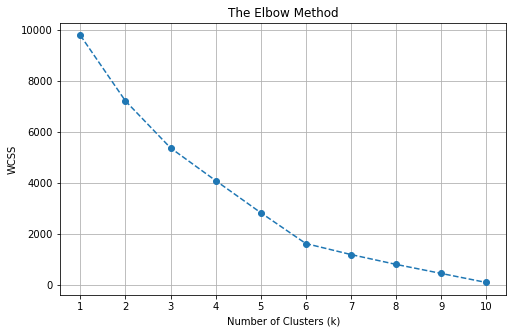

In [25]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):  # Testing for k = 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Append WCSS for each k

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [62]:
# Step 1: Apply K-Means with k=6
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=300)
kmeans.fit(X_scaled)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=42)

In [63]:
# Step 2: Add cluster labels to the original data
df['Cluster'] = kmeans.labels_

In [64]:
# Step 3: Analyze Clusters
# View cluster sizes
print("Cluster Sizes:")
print(df['Cluster'].value_counts())

Cluster Sizes:
Cluster
0    116
4     59
3     59
1     58
2     58
Name: count, dtype: int64


In [65]:
# View cluster centroids
print("\nCluster Means:")
print(df.groupby('Cluster').mean())


Cluster Means:
              Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                           
0        0.786004     0.056422         0.106527        0.171053   
1        0.183570     0.945617         0.928571        0.951906   
2        0.173428     0.252042         0.331281        0.488203   
3        0.477567     0.355802         0.334140        0.617306   
4        0.277168     0.679920         0.590799        0.812667   

         Discount Applied  Days Since Last Purchase  Satisfaction Level  \
Cluster                                                                   
0                     0.5                  0.418742            0.350575   
1                     0.0                  0.040230            0.333333   
2                     1.0                  0.675926            0.666667   
3                     0.0                  0.116133            0.045198   
4                     1.0                  0.288763            0

In [66]:
# Step 4: Optional Visualization
# Reduce dimensions for plotting (2D visualization using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

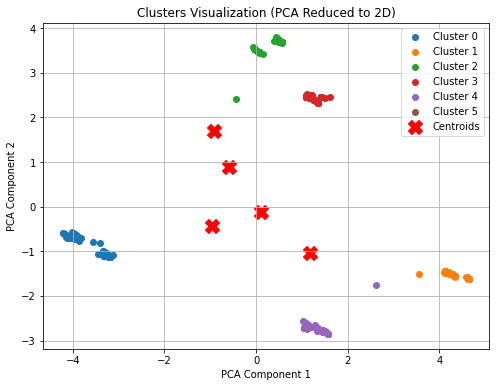

In [67]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(6):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], 
                X_pca[df['Cluster'] == cluster, 1], 
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.title('Clusters Visualization (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()